In [34]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [35]:
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates          # for plotting dates
from matplotlib import gridspec            # to arrange the plots nicely
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle

import pandas as pd

import glob

import os.path

import ROOT
from root_numpy import root2array, tree2array

from IPython.display import Image
from IPython.display import display
from IPython.core.display import HTML 

from collections import defaultdict

from pathlib import Path

from tqdm import tqdm

import datetime

# matplotlib configuration
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'   # enable if you have a retina display
matplotlib.rc('font', size = 16)                 # Use big fonts...
plt.rcParams['figure.figsize'] = (10, 8)         # ... and big plots
#plt.rcParams['figure.figsize'] = (6, 4) 
plt.set_cmap('viridis')

In [36]:
# From Erik Hogenbirk's notes and functions
def get_file_list(path, pattern, remove_string='', remove_path=True):
    '''
    Get a liuserst of files matching pattern in path. Optional to remove a part of the path (i.e. the extention)
    Optional to remove the path
    '''
    file_list = glob.glob(path + pattern)
    # Remove path
    for i, f in enumerate(file_list):
        if remove_path:
            f = f.replace(path, '')
        if remove_string != '':
            f = f.replace(remove_string, '')
        file_list[i] = f
    file_list = np.sort(file_list)
    return file_list

In [37]:
mainpath = 'data-challenge/'
g_stnd = mainpath + 'gluons_standard/'
q_stnd = mainpath + 'quarks_standard/'

In [38]:
N_toload = 100

## Loading Standard Gluons

In [39]:
filelist = get_file_list(g_stnd,'REDUCED_gluons_*', '.root')
print(filelist[:5])

['REDUCED_gluons_0' 'REDUCED_gluons_1' 'REDUCED_gluons_10'
 'REDUCED_gluons_100' 'REDUCED_gluons_1002']


In [40]:
file_select = filelist[:N_toload]

In [41]:
data_l = []

for i in tqdm(file_select):
    direc = i + '.root'
    #print ('loading',  direc)
    Rfile = ROOT.TFile(g_stnd+direc)
    tree = Rfile.Get('treeJets')
    events = tree.GetEntries()
    #print (eventos, "entries read from sorted file")
    branchez = tree2array(tree, branches=['jetPt',
                                                      'jetEta',
                                                      'jetPhi',
                                                     'jetMass',
                                                     'ntracks',
                                                     'ntowers',
                                                     'trackPt',
                                                     'trackEta',
                                                     'trackPhi',
                                                     'trackCharge',
                                                     'towerE',
                                                     'towerEem',
                                                     'towerEhad',
                                                     'towerEta',
                                                     'towerPhi'])
    df_ = pd.DataFrame(branchez)
    data_l.append(df_)


100%|██████████| 100/100 [00:00<00:00, 119.74it/s]


In [42]:
data_gluons = pd.concat(data_l)

In [43]:
data_gluons.to_pickle('saves/data_gluons100.pkl')

#### To load from pickle file

In [44]:
#data_gluons = pd.read_pickle('saves/data_gluons100.pkl')

## Loading Standard Quarks

In [45]:
filelist = get_file_list(q_stnd,'REDUCED_quarks_*', '.root')
print(filelist[:5])

['REDUCED_quarks_0' 'REDUCED_quarks_1' 'REDUCED_quarks_10'
 'REDUCED_quarks_100' 'REDUCED_quarks_1000']


In [46]:
file_select = filelist[:N_toload]

In [47]:
data_l = []

for i in tqdm(file_select):
    direc = i + '.root'
    #print ('loading',  direc)
    Rfile = ROOT.TFile(q_stnd+direc)
    tree = Rfile.Get('treeJets')
    events = tree.GetEntries()
    #print (eventos, "entries read from sorted file")
    branchez = tree2array(tree, branches=['jetPt',
                                                      'jetEta',
                                                      'jetPhi',
                                                     'jetMass',
                                                     'ntracks',
                                                     'ntowers',
                                                     'trackPt',
                                                     'trackEta',
                                                     'trackPhi',
                                                     'trackCharge',
                                                     'towerE',
                                                     'towerEem',
                                                     'towerEhad',
                                                     'towerEta',
                                                     'towerPhi'])
    df_ = pd.DataFrame(branchez)
    data_l.append(df_)


100%|██████████| 100/100 [00:01<00:00, 56.43it/s]


In [48]:
data_quarks = pd.concat(data_l)

In [49]:
data_quarks.to_pickle('saves/data_quarks100.pkl')

#### To load from pickle file

In [50]:
#data_quarks = pd.read_pickle('saves/data_quarks100.pkl')

## Concat both quarks and gluons

In [51]:
data_quarks['is_quark'] = 1
data_gluons['is_quark'] = 0

In [52]:
data_tot = pd.concat([data_quarks,data_gluons])

In [53]:
len(data_tot) == len(data_gluons) + len(data_quarks)

True

In [54]:
del data_gluons, data_quarks

In [55]:
len(data_tot)

331447

In [56]:
data_tot.head()

,jetPt,jetEta,jetPhi,jetMass,ntracks,ntowers,trackPt,trackEta,trackPhi,trackCharge,towerE,towerEem,towerEhad,towerEta,towerPhi,is_quark
0,103.684669,0.935927,-0.462394,12.185929,10,11,"[0.658297, 2.99041, 4.54432, 7.43951, 6.03095,...","[0.974205, 0.724936, 0.843639, 0.881152, 0.885...","[-0.786424, -0.43412, -0.509825, -0.529073, -0...","[1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -...","[5.40526, 1.7866, 0.506928, 2.19815, 2.01827, ...","[0.0, 1.7866, 0.506928, 2.19815, 2.01827, 5.71...","[5.40526, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[1.11813, 0.98138, 0.72509, 0.882321, 1.11605,...","[-0.174458, -0.807864, -0.685259, -0.753272, -...",1
1,105.459686,-2.169188,-0.184820,5.329337,6,13,"[4.75203, 11.5548, 12.1593, 14.7636, 5.79062, ...","[-2.15903, -2.15263, -2.16527, -2.15561, -2.18...","[-0.0971889, -0.202023, -0.206949, -0.175935, ...","[1.0, -1.0, -1.0, 1.0, 1.0, -1.0]","[2.68879, 0.652871, 1.06423, 2.30867, 10.1491,...","[2.68879, 0.652871, 1.06423, 2.30867, 10.1491,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-2.4875, -2.20908, -2.34613, -2.18052, -2.074...","[-0.148883, -0.488303, -0.400675, -0.331134, -...",1
2,117.692581,2.052179,1.525573,6.688938,8,3,"[1.21861, 1.90776, 6.72233, 2.28901, 6.63201, ...","[2.18729, 2.12519, 1.97753, 2.10783, 1.99983, ...","[1.22483, 1.45326, 1.46805, 1.583, 1.52557, 1....","[-1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0]","[2.06779, 3.93498, 117.223]","[2.06779, 3.93498, 0.0]","[0.0, 0.0, 117.223]","[2.07049, 2.03573, 2.07084]","[1.84012, 1.65678, 1.54928]",1
3,118.608940,1.031448,1.762748,8.983985,9,11,"[0.909293, 3.46142, 3.94686, 6.87763, 7.5992, ...","[1.37594, 1.09802, 1.02046, 1.10247, 1.06275, ...","[1.679, 1.866, 1.64923, 1.78978, 1.71343, 1.76...","[1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0]","[0.637116, 0.698088, 0.649282, 1.34355, 0.8573...","[0.637116, 0.698088, 0.649282, 1.34355, 0.8573...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 41.0815, 0.0, 0...","[0.997764, 0.993801, 0.766123, 0.870325, 1.164...","[2.09247, 1.44031, 1.6079, 1.53551, 1.84283, 1...",1
4,112.469429,0.128362,2.737449,24.100706,11,12,"[4.78455, 2.89064, 1.82962, 10.2045, 3.6043, 4...","[0.411526, 0.413723, 0.131721, 0.230755, 0.133...","[2.49044, 2.52339, 2.42645, 2.48392, 2.7275, 2...","[-1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1...","[1.15971, 1.56974, 10.269, 0.937413, 22.5689, ...","[1.15971, 1.56974, 0.0, 0.937413, 0.0, 1.89541...","[0.0, 0.0, 10.269, 0.0, 22.5689, 0.0, 0.0, 0.0...","[0.102403, 0.0165063, -0.0242264, -0.0495756, ...","[2.87266, 2.68738, 2.66874, 2.73986, 2.72819, ...",1


In [60]:
data_tot.to_pickle('saves/data_tot100.pkl')

#### To load from pickle file

In [61]:
#data_tot = pd.read_pickle('saves/data_tot100.pkl')

### Make dem plots!

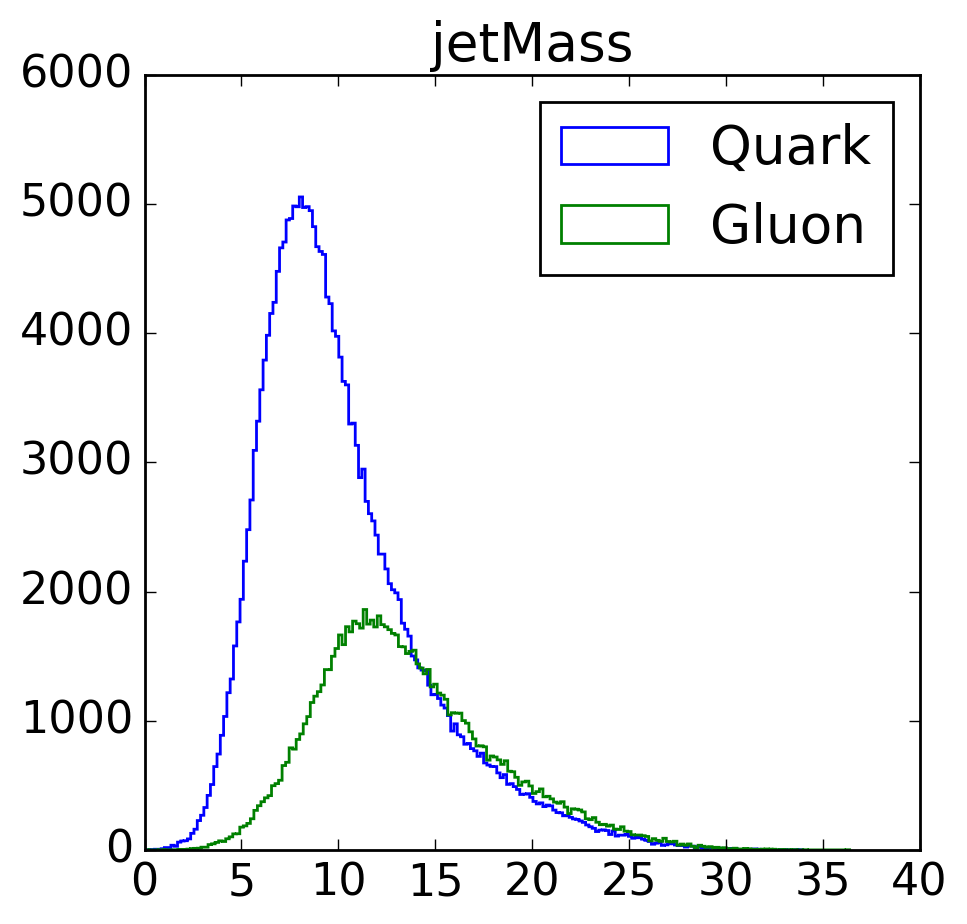

In [59]:
plt.figure(figsize=(5,5))
plt.hist(data_tot[data_tot['is_quark'] == 1]['jetMass'],
        bins = 200,
        histtype = 'step',
        label = 'Quark')
plt.hist(data_tot[data_tot['is_quark'] == 0]['jetMass'],
        bins = 200,
        histtype = 'step',
        label = 'Gluon')
plt.title('jetMass')
plt.legend()
plt.show()